# Particle Morphology and Elemental Composition Analysis Notebook

## Overview
This Jupyter notebook provides a comprehensive analysis of particle morphology and elemental composition data, focusing on detailed characterization of material properties through advanced data visualization and statistical techniques.

## Key Objectives
- Analyze particle frequency and area distributions based on a morphological parameter
- Track morphological characteristics across different build cycles
- Track elemental composition changes over build cycles
- Visualize average morphological parameters across build cycls

## Data Sources
- Primary:
  - FlowCAM exported CSV
  - ImageJ (PyImageJ) Analyze Particle results CSV
- Secondary:
  - [alm_ortho_powder_reuse_lot_configurations.json](alm_ortho_powder_reuse_lot_configurations.json)

## Key Visualization Techniques

### 1. Particle Distribution Analysis (`prepare_distribution_subplots`)
- **Frequency Distribution Plot** (`plot_particle_frequency_distribution`)
  - Dual-axis histogram showing:
    - Particle count distribution
    - Cumulative frequency percentage
  - Enables detailed analysis of particle count characteristics

- **Area Distribution Plot** (`plot_particle_area_distribution`)
  - Dual-axis histogram depicting:
    - Binned area percentage distribution
    - Cumulative area percentage
  - Provides insights into particle size and area contributions

### 2. **Average Morphological Parameter Visualization** (`plot_average-data`)
- Error bar plots for key morphological parameters
- Supports data filtering based on size ranges
- Highlights variations across build cycles

### 3. **Elemental Composition Trend Analysis** (`prepare_element_plot`)
- Plots element compositions over build cycles
- Supports:
  - Individual lot scatter plots
  - Individual lot trend lines
  - Average trend line calculations
  - Threshold line visualization

## Typical Workflow
1. Load raw data from CSV source
2. Preprocess and filter morphological data
3. Generate distribution and trend plots
4. Analyze elemental composition changes
5. Visualize particle morphological characteristics

## Visualization Customization
- Supports extensive plot styling options
- Configurable:
  - Line styles and colors
  - Marker types
  - Axis limits
  - Font sizes

## Dependencies
- pandas
- numpy
- matplotlib
- plotly.express
- utils.calculations.compute_bin_and_cumulative_area_percentages
- utils.calculations.build_diameter_metrics_dataframe
- utils.calculations.add_frequency_stats_to_dataframe
- utils.column_utils.index_column_name

## Notes
- Meaningful results depend on:
  - Data quality
  - Appropriate preprocessing
  - Careful parameter selection
- Visualization parameters may need adjustment based on specific datasets
- Focuses on understanding material evolution across build cycles


In [1]:
import pandas as pd
import sys          # Required for acessing aspects of python runtime environment
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np  # Required for Data filtering
from utils.calculations import (
    compute_bin_and_cumulative_area_percentages, 
    build_diameter_metrics_dataframe,
    add_frequency_stats_to_dataframe
    )
from utils.column_utils import index_column_name

mpl.rcParams["font.weight"] = "normal"
mpl.rcParams["font.family"] = "Times New Roman"


# Notebook and Python environment systus.
print(f'current working directory: {os.getcwd()}')
print(f'Folder paths in system environment (Python): {sys.path}')

current working directory: /Users/Daniel/Desktop/projects/data_visualization/Data Processing, Regression, Visualizations/Visualization
Folder paths in system environment (Python): ['/Users/Daniel/Desktop/projects/data_visualization/src', '/Users/Daniel/Desktop/Ti64_Comp_Tools/src', '/Users/Daniel/Desktop/projects/data_visualization/Data Processing, Regression, Visualizations/Visualization', '/opt/anaconda3/envs/imageprocessing-py-dev/lib/python39.zip', '/opt/anaconda3/envs/imageprocessing-py-dev/lib/python3.9', '/opt/anaconda3/envs/imageprocessing-py-dev/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/imageprocessing-py-dev/lib/python3.9/site-packages']


# Plot Physical Particle Parameters 

#### Frequency Distribution 

Specify inputs:

In [2]:
file_path = '/Users/Daniel/Desktop/FlowcamData/P1444/Group\ 1\ Rev\ 10/2024-10-29\ P1444\ Group\ 1\ Rev\ 10\ R01_PP2\ exported.csv'.replace('\\','') # (str) Path to Data File

# Load CSV file to DataFrame
df = pd.read_csv(file_path, encoding="latin1")
print(f"Successfully loaded CSV file with shape {df.shape}.")

df.columns

Successfully loaded CSV file with shape (2214, 70).


Index(['Name', 'Area (ABD) (µm²)', 'Area (Filled) (µm²)', 'Aspect Ratio',
       'Average Blue', 'Average Green', 'Average Red',
       'Biovolume (Cylinder) (µm³)', 'Biovolume (P. Spheroid) (µm³)',
       'Biovolume (Sphere) (µm³)', 'Calibration Factor', 'Calibration Image',
       'Capture ID', 'Capture X (px)', 'Capture Y (px)', 'Ch1 Area',
       'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width',
       'Ch2/Ch1 Ratio', 'Circle Fit', 'Circularity', 'Circularity (Hu)',
       'Compactness', 'Convex Perimeter (µm)', 'Convexity', 'Date',
       'Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)',
       'Edge Gradient', 'Elapsed Time (s)', 'Elongation',
       'Feret Angle Max (°)', 'Feret Angle Min (°)', 'Fiber Curl',
       'Fiber Straightness', 'Filter Score', 'Geodesic Aspect Ratio',
       'Geodesic Length (µm)', 'Geodesic Thickness (µm)', 'Group ID',
       'Image Height (px)', 'Image Width (px)', 'Intensity', 'Length (µm)',
       'Particles Per Chain'

Plotting Configurations

In [9]:
# Plotting parameters:
x_col = index_column_name(df, 'Diameter')
area_col = index_column_name(df, 'Area')
y_col = "Cumulative Frequency" # (str) Column name for the y_axis for the particle distribution, e.g., "Cumulative Frequency"
bin_width = 5 # (float) The size of the bin width for particle and area distribution plots.
print(f"Selected x_col: {x_col}, area_col: {area_col}.")

# Plot Titles
# parameter_distribution_title = f"Particle Distrbution of {x_col}" # (str) The title of the Particle Distribution Plot.
# area_parameter_distribution_title = "Area (µm²) Distribution" # (str) The title of the Area Distribution Plot.

# Specify output directories (if needed)
output_filepath1 = None # Example filename: f"particle_distrbution_{x_col}_{y_col}.png" (not full file path)
output_filepath2 = None # Example filename: "area_distribution_{x_col}_{area_col}.png"
output_subplot = None # Example filename, "distribution_subplots.png"

Multiple columns matched the guess 'Diameter':
	0: Diameter (ABD) (µm)
	1: Diameter (ESD) (µm)
	2: Diameter (FD) (µm)
Multiple columns matched the guess 'Area':
	0: Area (ABD) (µm²)
	1: Area (Filled) (µm²)
	2: Ch1 Area
	3: Ch2 Area
Selected x_col: Diameter (ABD) (µm), area_col: Area (ABD) (µm²).


Filter parameter column :

In [6]:

# Define the range 
lower_limit = 40
upper_limit = 110

print(f'Filtering based on `{x_col}` Column, closed interval: [{lower_limit}, {upper_limit}].')

# Filter the DataFrame in place
df.loc[:] = df.loc[
    (df[x_col] >= lower_limit) & (df[x_col] <= upper_limit)
]


Filtering based on `Diameter (ABD) (µm)` Column, closed interval: [40, 110].


Calculate and add Columns to DataFrame 

In [7]:
def process_physical_parameter(
    df, parameter_column, area_column=None
):
    """
    Process a user-selected physical parameter (e.g., diameter, circularity, aspect ratio).

    Args:
        df (pandas.DataFrame): The DataFrame containing the data to process.
        parameter_column (str): The physical parameter chosen by the user.
        area_column (str, optional): The name of the column containing particle 
            area for diameter calculation, if required. Defaults to None indicating Flowcam Dataset.

    Returns:
        pandas.DataFrame: The updated DataFrame with relevant metrics added.

    Raises:
        KeyError: If the required column for the chosen parameter is missing in the DataFrame.
    """
    # Process diameter-specific logic
    if "diameter" in parameter_column.lower():
        print("User selected 'Diameter' column. Calling build_diameter_metrics_dataframe.")
        df, _ = build_diameter_metrics_dataframe(
            df, target_column=parameter_column, area_col=area_column
        )
    else:
        print(f"User selected '{parameter_column}'. Calling add_frequency_stats_to_dataframe.")
        df, _ = add_frequency_stats_to_dataframe(df, parameter_column)

    return df

df = process_physical_parameter(df=df, parameter_column=x_col, area_column=None)

2024-12-11 13:33:01,786 - INFO - Adding frequency-related columns for 'Diameter (ABD) (µm)'.
2024-12-11 13:33:01,806 - INFO - Frequency columns added successfully.


User selected 'Diameter' column. Calling build_diameter_metrics_dataframe.


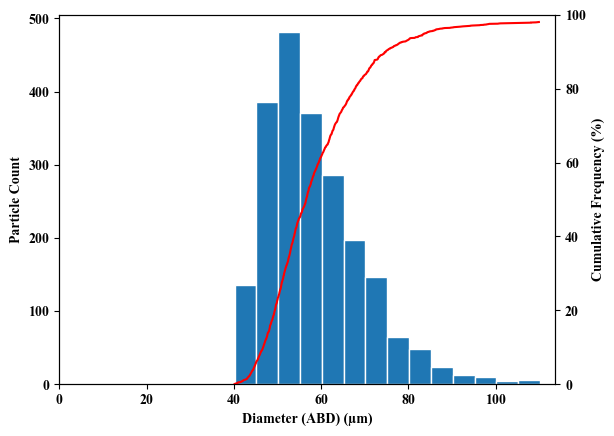

In [10]:
# Build Figure 1: particle distribution
def plot_particle_frequency_distribution(
        dataframe: pd.DataFrame,
        parameter_column: str,
        bin_width: float = 1,
        plot_title: str = None,
        output_path: str = None
) -> plt.Figure:
    """ 
    Creates a histogram and overlays a line plot based on a specified physical particle parameter 
    from the provided DataFrame. 
    
    The histogram shows the count distribution of the particle parameter, while the scatter plot 
    displays the cumulative frequency percentage. The histogram is plotted on the primary y-axis, 
    and the scatter plot appears on the secondary y-axis.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame containing distribution data
        parameter_column (str): Name of the column to visualize
        bin_width (float, optional): Width of histogram bins. Defaults to 1.0.
        plot_title (str, optional): Title for the plot. Defaults to None.
        output_filepath (str, optional): Path to save the plot image. Defaults to None.

    Returns:
        plt.Figure: Matplotlib figure with the distribution plot
    """
    # Validate input column
    if parameter_column not in dataframe.columns:
        raise ValueError(f"The specified column '{parameter_column}' does not exist in the DataFrame.")
    
    # Calculate histogram bin edges 
    bin_edges = np.arange(df[parameter_column].min(), df[parameter_column].max() + bin_width, bin_width)

    # Calculate histogram counts
    histogram_counts, _ = np.histogram(df[parameter_column], bins=bin_edges)

    # Create figure and primary axis for count distribution
    fig, primary_axis = plt.subplots()
    primary_axis.hist(
        x=bin_edges[:-1], 
        bins=bin_edges, 
        weights=histogram_counts,
        edgecolor='white',
        linewidth=1
    )
    # Set Primary axis labels and limits
    primary_axis.set_ylabel('Particle Count')
    primary_axis.set_xlabel(x_col) # Change x_col to be any "string"
    primary_axis.set_xlim(left=0)
    # primary_axis.set_xlim(right=1)

    # Create Secondary axis for Cumulative Frequency (%)
    secondary_axis = primary_axis.twinx()
    secondary_axis.plot(
        dataframe[parameter_column], 
        dataframe['Cumulative Frequency'], 
        color='red'
    )
    secondary_axis.set_ylabel('Cumulative Frequency (%)')
    secondary_axis.set_ylim(0, 100.01)

    # Set optional title
    if plot_title:
        plt.title(plot_title)
    
    # Save optional Figure 
    if output_path is not None:
        plt.savefig(output_path, dpi=300)

    return fig

figure1 = plot_particle_frequency_distribution(df, x_col, bin_width=bin_width, plot_title=None, output_path=None)

2024-12-11 13:39:08,055 - INFO - Using 'Area (ABD) (µm²)' as the area column.


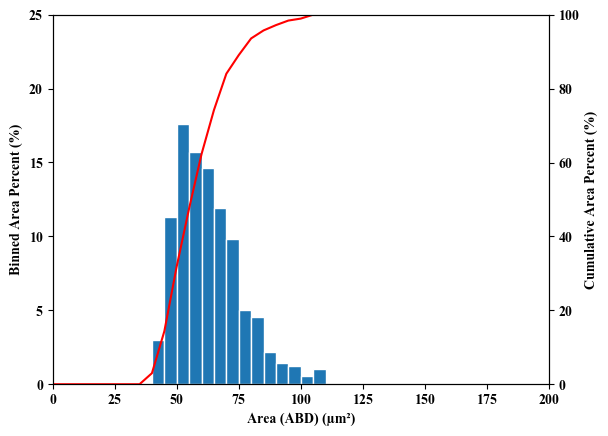

In [14]:
# # Build Figure 2: area distribution 
def plot_particle_area_distribution(
        dataframe: pd.DataFrame, 
        parameter_column: str, 
        area_col: str = None,
        bin_width: float = 1, 
        plot_title: str = None,
        output_path: str = None 
) -> plt.Figure:
    """
    Creates a histogram showing the area percentage distribution based on a specified physical particle parameter
    from the provided data file. The plot overlays a line plot of the cumulative area percentage using the same parameter. 
    
    The histogram is displayed on the primary y-axis, and the scatter plot appears on the secondary y-axis.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame containing distribution data
        parameter_column (str): Name of the column to visualize
        area_column (str, optional): Column for area percentage calculations. Defaults to None.
        bin_width (float, optional): Width of histogram bins. Defaults to 1.0.
        plot_title (str, optional): Title for the plot. Defaults to None.
        output_filepath (str, optional): Path to save the plot image. Defaults to None.

    Returns:
        plt.Figure: Matplotlib figure with the distribution plot
        
    """
    # Validate input column
    if parameter_column not in dataframe.columns:
        raise ValueError(f"The specified column '{parameter_column}' does not exist in the DataFrame.")

    # Calculate area percentage data using the specified x_col and area_col (or compute it if None)
    area_col, bin_edges, area_percent_distribution, cumulative_area_percent = (
            compute_bin_and_cumulative_area_percentages(
            df,
            target_column=parameter_column,
            area_column=area_col,
            bin_width=bin_width
        )
    )
    
    # Create plot
    fig, primary_axis = plt.subplots()

    # Primary axis: Area percentage  histogram
    primary_axis.hist(
        x=bin_edges[:-1], 
        bins=bin_edges, 
        weights=area_percent_distribution,
        edgecolor='white',
        linewidth=1,
        # color="black"
    )
    
    primary_axis.set_ylabel('Binned Area Percent (%)')
    primary_axis.set_xlabel(area_col) # Replace `area_col` to be any `string`
    primary_axis.set_xlim(0,200)
    primary_axis.set_ylim(0, 25)

    # Secondary axis: Cumulative area percentage
    secondary_axis = primary_axis.twinx()
    secondary_axis.plot(bin_edges[:-1], cumulative_area_percent, color='red')
    secondary_axis.set_ylabel('Cumulative Area Percent (%)')
    secondary_axis.set_ylim(0, 100.01)

    # Set title
    if plot_title:
        plt.title(plot_title)
    
    # Save Figure 
    if output_path is not None:
        plt.savefig(output_path, dpi=300)

    return fig

# Call function, store in variable
figure2 = plot_particle_area_distribution(
    dataframe=df, 
    parameter_column=x_col, 
    area_col=area_col,
    bin_width=bin_width,
    plot_title=None, 
    output_path=None)

In [20]:
def prepare_distribution_subplots(
    dataframes: list[pd.DataFrame],
    parameter_column: str,
    area_col: str = None, 
    bin_width: float = 1,
    plot_titles: list[str] = None,
    output_path: str = None
):
    """
    Create side-by-side subplots visualizing distributions and cumulative statistics for multiple datasets.

    Parameters:
        dataframes (list[pd.DataFrame]): List of dataframes to visualize.
        parameter_column (str): Column to analyze (e.g., "diameter").
        area_col (str, optional): Column for area percentages; computed if None. Defaults to None.
        bin_width (float, optional): Width of histogram bins. Defaults to 1.0.
        plot_titles (list[str], optional): List of titles for each dataset's row. Defaults to None.
        output_path (str, optional): Path to save the figure. Defaults to None.
    """
    num_files = len(dataframes)
    fig, axes = plt.subplots(num_files, 2, figsize=(10, 5 * num_files))

    for idx, df in enumerate(dataframes):
        # Calculate histogram data
        histogram_counts, bin_edges = np.histogram(
            df[parameter_column], 
            bins=np.arange(
                df[parameter_column].min(),
                df[parameter_column].max() + bin_width, 
                bin_width
            )
        )
        
        # Access axes for this row
        ax1_primary, ax2_primary = axes[idx] if num_files > 1 else axes

        # Left subplot (Particle count and cumulative frequency)
        ax1_primary.hist(
            x=bin_edges[:-1], 
            bins=bin_edges, 
            weights=histogram_counts,
            edgecolor='white',
            linewidth=1
        )
        ax1_primary.set_ylabel('Particle Count')
        ax1_primary.set_xlabel(parameter_column)
        ax1_primary.set_xlim(left=0)
        ax1_primary.set_ylim(bottom=0)

        ax1_secondary = ax1_primary.twinx()
        ax1_secondary.plot(
            df[parameter_column], 
            df['Cumulative Frequency'], 
            color='red'
        )
        ax1_secondary.set_ylabel('Cumulative Frequency (%)')
        ax1_secondary.set_ylim(0, 100.01)

        # Right subplot (Area percent and cumulative area percentage)
        area_col, bin_edges, area_percent_distribution, cumulative_area_percent = (
            compute_bin_and_cumulative_area_percentages(
                df,
                target_column=parameter_column,
                area_column=area_col,
                bin_width=bin_width
            )
        )

        ax2_primary.hist(
            x=bin_edges[:-1], 
            bins=bin_edges, 
            weights=area_percent_distribution,
            edgecolor='white',
            linewidth=1
        )
        ax2_primary.set_ylabel('Binned Area Percent (%)')
        ax2_primary.set_xlabel(area_col)
        ax2_primary.set_xlim(left=0)
        ax2_primary.set_ylim(bottom=0)

        ax2_secondary = ax2_primary.twinx()
        ax2_secondary.plot(bin_edges[:-1], cumulative_area_percent, color='red')
        ax2_secondary.set_ylabel('Cumulative Area Percent (%)')
        ax2_secondary.set_ylim(0, 100.01)

        # Add titles if provided
        if plot_titles and idx < len(plot_titles):
            ax1_primary.set_title(plot_titles[idx])

    # Save optional figure
    if output_path:
        plt.savefig(output_path, dpi=300)

    # Tighten layout and show
    plt.tight_layout()
    plt.show()

# Example Usage
# Define dile paths
file1 = "/Users/Daniel/Desktop/MorphologyData/Ti64 P2328/Group 4 Rev 1/2024-10-30 P2328 Group 4 Rev 1 R01 PP1 exported.csv"
file2 = "/Users/Daniel/Desktop/MorphologyData/P1444/Group 3 Rev 5/2024-10-30 P1444 Group 3 Rev 5 R02 PP1 exported.csv"
file3 = "/Users/Daniel/Desktop/MorphologyData/P1444/Group 1 Rev 10/2024-10-29 P1444 Group 1 Rev 10 R01_PP2 exported.csv"
# Define DataFrames
df1 = pd.read_csv(file1, encoding='latin1')
df2 = pd.read_csv(file2, encoding='latin1')
df3 = pd.read_csv(file3, encoding='latin1')

# Process DataFrames: add columns for plotting
df1 = process_physical_parameter(df=df1, parameter_column=x_col, area_column=None)
df2 = process_physical_parameter(df=df2, parameter_column=x_col, area_column=None)
df3 = process_physical_parameter(df=df3, parameter_column=x_col, area_column=None)

# Establish list of DataFrames to plot
dataframes = [df1, df2, df3]  # Replace with actual DataFrames

prepare_distribution_subplots(
    dataframes=dataframes, # Change to [df1] if one dataframe is desired
    parameter_column=x_col,
    area_col=area_col,
    bin_width=bin_width,
    plot_titles=["File 1", "File 2", "File 3"],
    output_path=None # example: "combined_plot.png"
)



NameError: name 'process_physical_parameter' is not defined

### Plot for Average Physical Parameter across Build Cycles

Index(['Name', 'Area (ABD) (ÂµmÂ²)', 'Area (Filled) (ÂµmÂ²)', 'Aspect Ratio',
       'Average Blue', 'Average Green', 'Average Red',
       'Biovolume (Cylinder) (ÂµmÂ³)', 'Biovolume (P. Spheroid) (ÂµmÂ³)',
       'Biovolume (Sphere) (ÂµmÂ³)', 'Calibration Factor', 'Calibration Image',
       'Capture ID', 'Capture X (px)', 'Capture Y (px)', 'Ch1 Area',
       'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width',
       'Ch2/Ch1 Ratio', 'Circle Fit', 'Circularity', 'Circularity (Hu)',
       'Compactness', 'Convex Perimeter (Âµm)', 'Convexity', 'Date',
       'Diameter (ABD) (Âµm)', 'Diameter (ESD) (Âµm)', 'Diameter (FD) (Âµm)',
       'Edge Gradient', 'Elapsed Time (s)', 'Elongation',
       'Feret Angle Max (Â°)', 'Feret Angle Min (Â°)', 'Fiber Curl',
       'Fiber Straightness', 'Filter Score', 'Geodesic Aspect Ratio',
       'Geodesic Length (Âµm)', 'Geodesic Thickness (Âµm)', 'Group ID',
       'Image Height (px)', 'Image Width (px)', 'Intensity', 'Length (Âµm)',
       'P

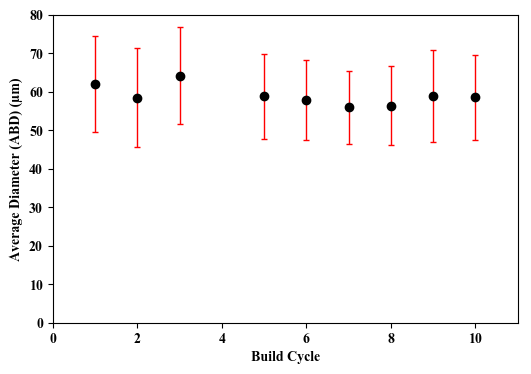

In [17]:
# Create plot 
def plot_average_data(
        df: pd.DataFrame,
        x_col: str, 
        y_col: tuple[str, str],
        filter_column: str = None,
        lower_limit: float = 40, 
        upper_limit: float = 110, 
        title: str = None,
        figsize: tuple = (6, 4),
        data_label: str = None,
        color: str = 'b',
        line_width: float = 2,
        x_limits: tuple[float, float] = (0,11),
        y_limits: tuple[float, float] = (0,80),
        
) -> plt.Figure:
    
    """
    Preprocess the data from Flowcam Export CSV file and plot average values with error bars.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing data to plot.
        x_col (str): Column name for x-axis values.
        y_col (tuple[str, str]): Tuple where the first element is the column name for y-axis values,
                                 and the second is the label for the y-axis.
        filter_column (str, optional): The column name to apply filtering on (i.e., 'Diameter (ABD) (Âµm)'). Defaults to None.
        lower_limit (float, optional): The lower limit for filtering the data. Defaults to None.
        upper_limit (float, optional): The upper limit for filtering the data. Defaults to None.                   
        title (str, optional): Plot title. Defaults to None.
        figsize (tuple, optional): Figure size in inches (width, height). Defaults to (6, 4).
        label (str, optional): Label for the data series. Defaults to None.
        color (str, optional): Line color for the plot. Defaults to 'b' (blue).
        line_width (float, optional): Line width of the plot. Defaults to 2.
        x_limits (tuple[float], optional): Limits for the x-axis. Defaults to (0, 11).
        y_limits (tuple[float], optional): Limits for the y-axis. Defaults to (0, 80).

    Returns:
        plt.Figure: The Matplotlib Figure object of the plot.
    """
    # Apply filtering if limits are provided
    if (filter_column is not None) and (lower_limit is not None) and (upper_limit is not None):
        if filter_column not in df.columns:
            raise KeyError(f"Filter column '{filter_column}' does not exist in the DataFrame.")
     # Filter the DataFrame based upon y-axis column ranges
        df = df.loc[(df[filter_column] >= lower_limit) & 
            (df[filter_column] <= upper_limit)].copy()

    # Extract 'Rev' number and cast to float
    df['Rev'] = df['Name'].str.extract(r'Rev (\d+)').astype(float)
    
    # Group by 'Rev' and calculate mean and std
    grouped = df.groupby('Rev')
    mean_df = grouped.mean().reset_index()
    std_df = grouped.std().reset_index()

    # Combine mean and std into a single DataFrame
    mean_key = 'Mean'
    error_key = 'Std'
    processed_df = pd.concat([mean_df, std_df], axis=1, keys=[mean_key, error_key])

    # Ensure necessary MultiIndex columns exist
    multindex_combinations = [(mean_key, x_col), (mean_key, y_col[0]), (error_key, x_col), (error_key, y_col[0])]
    if any(tuple(col) not in processed_df for col in multindex_combinations):
        raise ValueError(f"Missing required columns in DataFrame: {multindex_combinations}")
    
    # Sort values by the x_col (e.g., `Rev`) to ensure consistent plotting
    processed_df[mean_key]  = processed_df[mean_key].copy().sort_values(by="Rev", ignore_index=True)
    
    # Extract relevant data
    x = processed_df[mean_key][x_col]
    y = processed_df[mean_key][y_col[0]]
    y_error = processed_df[error_key][y_col[0]]

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=figsize)
   
    # Add data to axes with error bars
    ax.errorbar(
        x, y, 
        yerr=y_error,
        label= data_label,
        fmt='o',
        color=color,
        linewidth=line_width,
        capsize=2,
        ecolor='red', # Change color for error bars
        elinewidth=1
    )

    # Customize axes and labels
    ax.set_ylim(y_limits)
    ax.set_xlim(x_limits)
    ax.set_xlabel("Build Cycle" if x_col == 'Rev' else x_col)
    ax.set_ylabel(y_col[1])

    # Add title and legend if provided
    if title:
        ax.set_title(title)
    if data_label:
        ax.legend()

    plt.show()
    return fig


# Load file and store as pandas DataFrame
morphology_file = "/Users/Daniel/Desktop/MorphologyData/selected_combined_flowcam_output.csv"
morphology_df = pd.read_csv(morphology_file, encoding="latin1")
print(morphology_df.columns) # view column names 

# Make the plot
figure6 = plot_average_data(
    morphology_df, 
    x_col='Rev',
    y_col=('Diameter (ABD) (Âµm)','Average Diameter (ABD) (µm)'), # column name : Alias
    title=None,
    color='black',
    filter_column='Diameter (ABD) (Âµm)',
    lower_limit=40,
    upper_limit=110,
    )



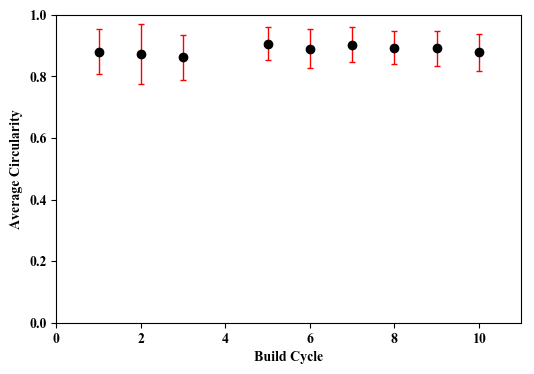

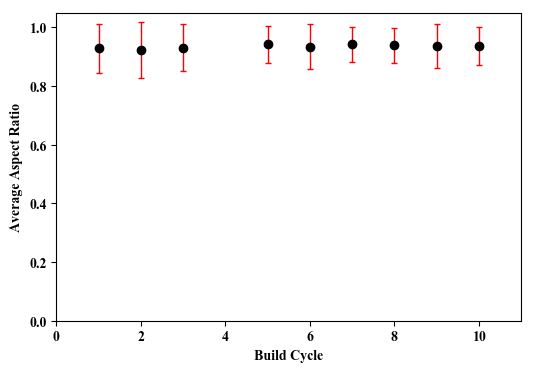

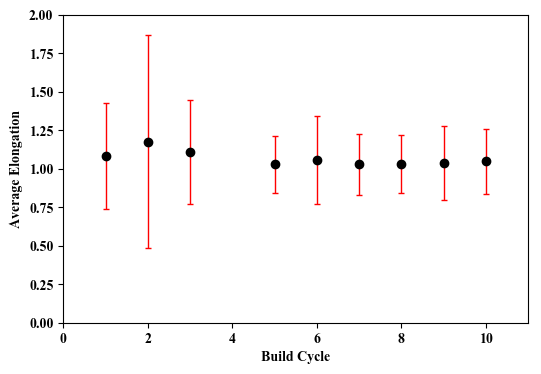

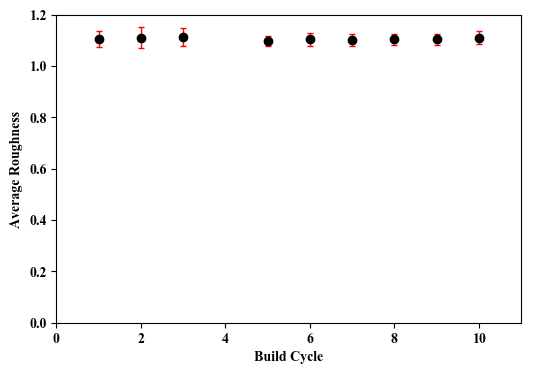

In [19]:
parameter_tuples = [
    (('Circularity','Average Circularity'), ((0,1.0))), 
    (('Aspect Ratio','Average Aspect Ratio'), (0,1.05)),
    (('Elongation','Average Elongation'), (0,2.0)),
    (('Roughness','Average Roughness'), (0,1.2))
    ]


for param, y_limit in parameter_tuples:
    figure7 = plot_average_data(
    morphology_df, 
    x_col='Rev',
    y_col=param, # column name : Alias
    title=None,
    color='black',
    filter_column='Diameter (ABD) (Âµm)',
    lower_limit=40,
    upper_limit=110,
    y_limits=y_limit
    )

# Plot Chemical Content

Load plotting configuration dictionaries:

In [18]:

# Load the lot_dict from the JSON file 
lot_data_file = '/path/to/alm_ortho_powder_reuse_lot_configurations.json'  # Dictionary for reused lots
with open(lot_data_file, 'r') as f:
    lot_config_dictionary = json.load(f)

# Dictionary for Element specific configurations      
elements_config_dictionary = {
    "Oxygen": {
        "name": "Oxygen (wt%)",            # Y-axis label
        "y_range": (0, 0.3),               # Example Y-axis range
    },
    "Aluminum": {
        "name": "Aluminum (wt%)",          # Y-axis label
        "y_range": (0, 7),                 # Example Y-axis range
    },
    "Iron": {
        "name": "Iron (wt%)",              # Y-axis label
        "y_range": (0, 0.3),               # Example Y-axis range
    },
    "Vanadium": {
        "name": "Vanadium (wt%)",          # Y-axis label
        "y_range": (0, 4.5),               # Example Y-axis range
    },
}


```python
# Accessing data for a specific lot (e.g., P1444)
lot_data = lot_config_dictionary['P1444']
print(f"Alias: {lot_data['alias']}")
print(f"Color: {lot_data['color']['name']}")
print(f"Marker Style: {lot_data.get('marker', {}).get('style', 'N/A')}") 
# Alternatively, to access the Marker Style:
print(f"Marker Style: {lot_config_dictionary['P1444']['marker']['style']}")
```

Define Functions:

In [25]:
# Helper Function
def initialize_fig(fig: plt.Figure = None, figsize: tuple[float, float] = None):
    """
    Initialize or retrieve a Matplotlib figure and its first axis.

    If no figure is provided, this function creates a new figure with a single axis.
    If a figure is provided, it retrieves the first axis of that figure.

    Parameters:
        fig (matplotlib.figure.Figure, optional): An existing Matplotlib figure. Defaults to None.
        figsize (tuple[float, float], optional): The size of the figure in inches as (width, height). 
            Default is None, meaning Matplotlib assigns a default size based on `rcParams["figure.figsize"]`.

    Returns:
        tuple: A tuple containing the Matplotlib figure (fig) and its first axis (ax).
    """
    # Guard clause to initialize fig and ax if not provided
    if fig is None:
        fig, ax = plt.subplots(figsize)
    else:
        ax = fig.axes[0]
    return fig, ax



def compute_and_plot_avg(
        df: pd.DataFrame, 
        element: str, 
        fig: plt.Figure = None,
        line_style: str = '--',
        line_color: str = 'black',
        line_width: float = 2,
        line_alpha: float = 0.7,  # Add alpha for transparency
) -> plt.Figure:
    """
    Compute and plot the average linear trend line for a given element.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        element (str): The name of the column for the dependent variable (e.g., "Oxygen (wt%)").
        fig (plt.Figure, optional): An existing matplotlib figure to plot on. Defaults to None.
        line_style (str, optional): Line style for the trend line. Defaults to '--'.
        line_color (str, optional): Color of the trend line. Defaults to 'black'.
        line_width (float, optional): Width of the trend line. Defaults to 2.
        line_alpha (float, optional): Transparency of the trend line. Defaults to 0.7.
    
    Returns:
        plt.Figure: The figure object with the average trend line plotted.
    """
    # call guard clause to initialize fig and ax if not provided
    fig, ax = initialize_fig(fig=fig, figsize=None)

    # Compute the linear fit
    x_values = df['Rev']        # build cycles
    poly_fit = np.polyfit(x_values, df[element], 1)
    y_fit = np.poly1d(poly_fit)(x_values)

    print(f"Average function: {np.poly1d(poly_fit)}")

    # Plot the trend line
    ax.plot(
        x_values, y_fit,
        label=f'Average Linear fit: slope={poly_fit[0]:.4f}, y-int={poly_fit[1]:.4f}',
        linestyle=line_style, linewidth=line_width, color=line_color,
        alpha=line_alpha, zorder=10  # Add transparency and ensure line is on top
    )
    return fig



def plot_lot_linear_fit(
        x:pd.Series,
        y:pd.Series,
        fig:plt.Figure,
        line_color: str = 'black',
        line_width: float = 2,
        set_label: str = None
)-> plt.Figure:

    """
    Compute and plot a linear trend line for a given individual Reuse powder lot describing how an element changes with build cycle.

    Parameters:
        x (pd.Series): The name of the column for the independent variable (e.g., "Rev").
        y (pd.Series): The name of the column for the dependent variable (e.g., "Oxygen (wt%)").
        fig (plt.Figure): An existing matplotlib figure to plot on.
        line_style (str, optional): Line style for the trend line. Defaults to '--'.
        line_color (str, optional): Color of the trend line. Defaults to 'black'.
        line_width (float, optional): Width of the trend line. Defaults to 2.
    
    Returns:
        plt.Figure: The figure object with the individual lot trend line plotted.
    """
    # call guard clause to initialize fig and ax if not provided
    fig, ax = initialize_fig(fig=fig, figsize=None)

    # Preform linear fir
    coef = np.polyfit(x,y,1)  
    trend_line = np.poly1d(coef)
    y_fit  = trend_line(x)

    # Use np.corrcoef to calculate Pearson correlation coefficient
    correlation_matrix = np.corrcoef(y, y_fit)
    r = correlation_matrix[0, 1]  # Extract the correlation coefficient
    r_squared = r**2  # Square it to get R^2

    print(f"\tFunction", trend_line)
    print(f"\tR^2: {r_squared}")

    ax.plot(
            x, y_fit, 
            label=set_label, #f'Lot {lot} Linear Fit Data - r^2: {r_squared:.4f}',
            linewidth=line_width, 
            color=line_color,
    )
    return fig



def plot_threshold(
        y:float, 
        xmin:float , 
        xmax:float, 
        fig:plt.Figure=None, 
        color: str='r', 
        line_style:str ='--'
) -> plt.Figure:

    # call guard clause to initialize fig and ax if not provided
    fig, ax = initialize_fig(fig=fig, figsize=None)
    
    ax.axhline(y=y, xmin=xmin, xmax=xmax, color=color, linestyle=line_style)
    return fig



def prepare_element_plot(
        df: pd.DataFrame, 
        element_names: list[str],
        styling_dict: dict,
        elements_dict: dict,
        avg_callback: callable = None,  
        add_lot_linearfit: callable = None,
        threshold_callback: callable = None,
        min_length: int = 2,
        line_width: int = 2, 
        font_size: int = 14,
        show_legend: tuple[bool, bool] = (True, True),
        plot_title: str = None
) -> plt.Figure:
    """
    Prepare plots for multiple elements' data, including optional average and individual lot trend lines.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing the data to be plotted.
        element_names (list[str]): List of column names for the elements to plot.
        styling_dict (dict): A dictionary with lot-specific styles (e.g., colors, markers).
        elements_dict (dict): A dictionary containing element-specific properties 
                              (e.g., column names, y_range, x_range) for each element.
        avg_callback (callable, optional): Callback function to compute and plot the average trend line. Defaults to None.
        add_lot_linearfit (callable, optional): Callback function to compute and plot individual lot linear fits. Defaults to None.
        threshold_callback (callable, optional): Callback function to add threshold lines to the plot. Defaults to None.
        min_length (int, optional): Minimum unique build cycles required for a lot to be plotted. Defaults to 2.
        line_width (int, optional): Line width for scatter and trend lines. Defaults to 2.
        font_size (int, optional): Font size for plot labels and titles. Defaults to 14.
        show_legend (tuple[bool, bool], optional): A tuple with two flags: 
            - First flag determines if the average trend line legend is shown.
            - Second flag determines if the lot-specific legends are shown. Defaults to (True, True).
        plot_title (str, optional): Title for the plot. Defaults to None.

    Returns:
        plt.Figure: The generated matplotlib figure.
    """
    # Set global plotting parameters
    plt.rcParams['font.size'] = font_size
    plt.rcParams['lines.dash_capstyle'] = 'butt'

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Set x-axis label and limits
    ax.set_xlabel("Build Cycles")
    ax.set_xlim(0, 10.5) # Fixed x_axis range

    # Initialize y_max to store the highest y limit
    y_max = 0  # Start with 0

    # Loop through the elements to gather their y_range and compute the max y_limit
    for element_name in element_names:
        element_info = elements_config_dictionary[element_name]
        y_range = element_info["y_range"]

        # Check the top y limit and update y_max
        y_max = max(y_max, y_range[1])

    # Set the y-axis limits (bottom=0 and top as the rounded max y_max)
    ax.set_ylim(0, round(y_max, 2))  # Round to 2 decimal places

    # Set the y-axis label
    if len(element_names) == 1:
        ax.set_ylabel(element_names[0])
    else:
        ax.set_ylabel("Element Compositions (wt%)")
    
    # Sort the DataFrame by build cycles
    df.sort_values(by='Rev', inplace=True)

    for element_name in element_names:
        # Access element-specific properties
        element_info = elements_dict[element_name]
        col_name = element_info["name"]

        print(f"Processing element: {col_name}")
        
        # Group data by lot and plot each lot's data
        for lot, lot_data in df.groupby('Lot'):
            unique_build_cycles = lot_data['Rev'].unique()
            if len(unique_build_cycles) > min_length:
                x, y = lot_data['Rev'], lot_data[col_name]
                print(f"\t+ {lot}, added ({len(unique_build_cycles)} build cycles).")
                ax.scatter(
                    x, y, 
                    label=f'Lot {lot}' if show_legend[1] else None,
                    marker=styling_dict[lot]["marker"]["style"],
                    linewidth=line_width,
                    color=styling_dict[lot]['color']['rgb_norm'],
                )
                if add_lot_linearfit:
                    fig = add_lot_linearfit(
                        x, y, fig,
                        line_color=styling_dict[lot]['color']['rgb_norm'],
                        line_width=line_width
                    )
                
            else:
                print(f"\t- {lot}, insufficient build cycles ({len(unique_build_cycles)}).")

        # Add average trend line
        if avg_callback:
            avg_callback(df, col_name, fig, 
                        line_style=(0, (3, 8, 3, 10)), 
                        line_alpha=0.9)

    # Add threshold horizontal line if callback is provided
    if threshold_callback:
        threshold_callback(y=0.20, xmin=0, xmax=11, fig=fig)

    # Set y-axis label
    if len(element_names) == 1:
        ax.set_ylabel(col_name)
    else:
        ax.set_ylabel("Element Compositions (wt%)") #  "Major Elements (wt%)"

    # Show legend and title if specified
    if show_legend[0]:
        plt.legend()
    if plot_title:
        plt.title(plot_title)

    return fig



Example:  
```python
# Load CSV as DataFrame
chemistry_dataframe = pd.read_csv('/path/to/Merged_Element_Composition_Tables.csv', encoding="latin1")

# Plot the element data 
figure = prepare_element_plot(
    df=chemistry_df, 
    element_names=["Oxygen"],
    styling_dict=lot_config_dictionary, 
    elements_dict=elements_config_dictionary,
    avg_callback=compute_and_plot_avg,
    add_lot_linearfit=plot_lot_linear_fit,
    threshold_callback=None,
    show_legend= (True,False),
    plot_title=None
)
# Show Figure
figure.show()
```

Note:
    see [here](https://community.plotly.com/t/plotly-colours-list/11730) for plotly colors. 

In [24]:
# Load CSV as DataFrame
chemistry_datafile = "/Users/Daniel/Desktop/Ti64_Comp_Tools/Ti_Powder_All_Lots/Powder Results Summary/Merged_Element_Composition_Tables.csv"     
chemistry_df = pd.read_csv(filepath_or_buffer=chemistry_datafile,encoding='latin1')

# Make Plot
figure1 = prepare_element_plot(
    df=chemistry_df, 
    element_names=["Oxygen"],
    styling_dict=lot_config_dictionary, 
    elements_dict=elements_config_dictionary,
    avg_callback=compute_and_plot_avg,
    add_lot_linearfit=plot_lot_linear_fit,
    threshold_callback=None, # plot_threshold
    show_legend= (True,True),
    plot_title=None
)
# Show Figure
figure1.show()

ValueError: Key lines.dash_capstyle: Unrecognized capstyle string "but": valid strings are ['butt', 'round', 'projecting']

Plot Major Elements

Processing element: Aluminum (wt%)
	- P0525, insufficient build cycles (1).
	+ P1440, added (8 build cycles).
	Function  
-0.01107 x + 6.448
	R^2: 0.0870418097149172
	+ P1442, added (8 build cycles).
	Function  
0.001429 x + 6.41
	R^2: 0.0019466498662964737
	+ P1444, added (10 build cycles).
	Function  
0.002396 x + 6.385
	R^2: 0.009722775771164685
	- P2002, insufficient build cycles (1).
	- P222, insufficient build cycles (2).
	- P2328, insufficient build cycles (2).
Average function:  
-0.000533 x + 6.406
Processing element: Iron (wt%)
	- P0525, insufficient build cycles (1).
	+ P1440, added (8 build cycles).
	Function  
-0.002465 x + 0.1952
	R^2: 0.18532246108228304
	+ P1442, added (8 build cycles).
	Function  
-0.000315 x + 0.1841
	R^2: 0.0019540482848150547
	+ P1444, added (10 build cycles).
	Function  
0.001423 x + 0.1846
	R^2: 0.15270052313627133
	- P2002, insufficient build cycles (1).
	- P222, insufficient build cycles (2).
	- P2328, insufficient build cycles (2).
Average func

/opt/anaconda3/envs/imageprocessing-py-dev/lib/python3.9/site-packages/matplotlib/figure.py:456: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  warnings.warn(


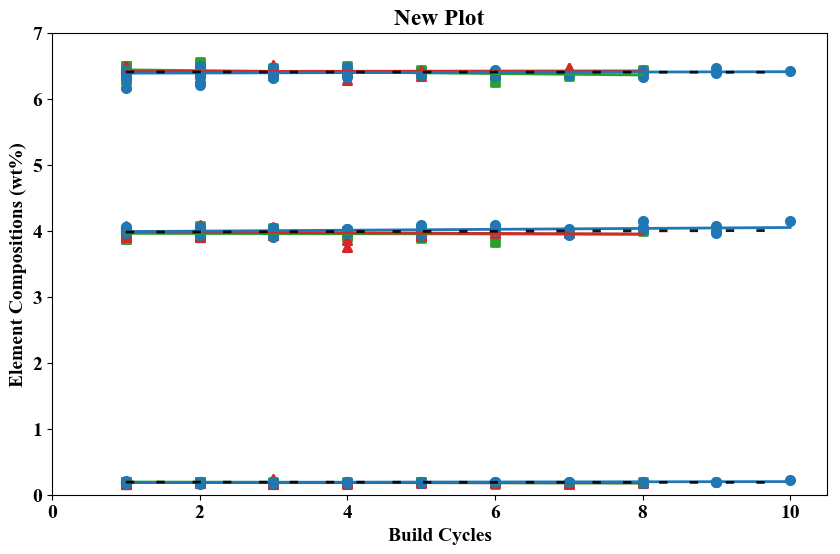

In [27]:
# Load CSV as DataFrame
# chemistry_datafile = "/Users/Daniel/Desktop/Ti64_Comp_Tools/Ti_Powder_All_Lots/Powder Results Summary/Merged_Element_Composition_Tables.csv"     
# chemistry_df = pd.read_csv(filepath_or_buffer=chemistry_datafile,encoding='latin1')

# Update the Chemistry Content DataFrame
condition = (chemistry_df["Vanadium (wt%)"] < 2) & (chemistry_df["Iron (wt%)"] > 2)
chemistry_df.loc[ condition, ["Vanadium (wt%)", "Iron (wt%)"]] = (
    chemistry_df.loc[condition, ["Iron (wt%)", "Vanadium (wt%)"]].values 
)

figure2 = prepare_element_plot(
    df=chemistry_df, 
    element_names=["Aluminum", "Iron", "Vanadium"],
    styling_dict=lot_config_dictionary, 
    elements_dict=elements_config_dictionary,
    avg_callback=compute_and_plot_avg,
    add_lot_linearfit=plot_lot_linear_fit,
    threshold_callback=None,
    show_legend= (False,True),
    plot_title=None # 
)
# Show Figure
figure2.show()



# Available samples

In [7]:
file1= "/Users/Daniel/Downloads/ALM Ortho powder inventory.xlsx"
file2 = "/Users/Daniel/Desktop/Ti64_Comp_Tools/Ti_Powder_All_Lots/Powder Results Summary/Merged_Element_Composition_Tables.csv"     
file1_df = pd.read_excel(file1, sheet_name="Flowcam and chemical content")
file2_df = pd.read_csv(file2)

In [9]:
# Rename 'GroupID' to 'Group' to match file1_df keys
file2_df = file2_df.rename(columns={'GroupID': 'Group'})

# Clean and Cast strings
# Ensure 'Lot', 'Group', and 'Rev' columns are of the same type in both DataFrames
file1_df['Lot'] = file1_df['Lot'].astype(str)
file1_df['Lot'] = file1_df['Lot'].str.strip()
file1_df['Group'] = file1_df['Group'].astype(str)
file1_df['Group'] = file1_df['Group'].str.strip()
file1_df['Rev'] = file1_df['Rev'].astype(str)
file1_df['Rev'] = file1_df['Rev'].str.strip()

file2_df['Lot'] = file2_df['Lot'].astype(str)
file2_df['Lot'] = file2_df['Lot'].str.strip()
file2_df['Group'] = file2_df['Group'].astype(str)
file2_df['Group'] = file2_df['Group'].str.strip()
file2_df['Rev'] = file2_df['Rev'].astype(str)
file2_df['Rev'] = file2_df['Rev'].str.strip()

# Compare Specifc columns
comparison_df = file1_df[['Lot','Group','Rev']].merge(
    file2_df[['Lot','Group','Rev']], how='right', indicator=True
)
print(comparison_df.shape)

# Filter for rows that are only in file2_df (missingin file1_df)
missing_in_file1 = comparison_df.loc[comparison_df['_merge'] == 'right_only']
missing_in_file1.head()

# Remove the merge indicator column
missing_in_file1 = missing_in_file1.drop(columns=['_merge'])

# Fill in the missing colums from file1_df  ('FlowCam' and 'Composition' column)
missing_in_file1['Composition'] = missing_in_file1.get('Composition','Yes')
missing_in_file1['FlowCam'] = missing_in_file1.get('FlowCam','DNE')

# Add the missing rows to file1_df
file1_df = pd.concat([file1_df, missing_in_file1], ignore_index=True)

file1_df.loc[:,'P/N'] = file1_df['P/N'].fillna(0)
# file1_df.to_csv("/Users/Daniel/Desktop/FlowcamData/total_titanium_powder_inventory.csv", index=False)

(143, 4)


In [17]:
# Check for duplicates based on all relevant columns
duplicate_rows = file1_df[file1_df.duplicated(subset=['Lot', 'Group', 'Rev', 'P/N', 'FlowCam', 'Composition'], keep=False)]

# Step 3: Handle duplicates
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print("There are duplicate entries based on the specified columns.")
else:
    print("No duplicates found.")

# Remove duplicates based on specified columns
df_cleaned = file1_df.drop_duplicates(subset=['Lot', 'Group', 'Rev', 'P/N', 'FlowCam', 'Composition'], keep='first')

# Step 3: Save or use the cleaned DataFrame
df_cleaned.to_excel('Ti64_powder_inventory_cleaned.xlsx', index=False)  # Save the cleaned file (optional)
print(f"Duplicates removed, keeping the first occurrence of each. \nSaved as 'Ti64_powder_inventory_cleaned.xlsx' in current working directory: {os.getcwd()}.")

Duplicate rows found:
       Lot Group Rev  P/N FlowCam Composition
119  P1442     6   3  0.0     DNE         Yes
124  P1442     6   3  0.0     DNE         Yes
There are duplicate entries based on the specified columns.
Duplicates removed, keeping the first occurrence of each. 
Saved as 'Ti64_powder_inventory_cleaned.xlsx' in current working directory: /Users/Daniel/Desktop/projects/data_visualization/Data Processing, Regression, Visualizations/Visualization.


Plot Available Chemical Composition Data 

In [18]:
composition_df = file1_df[file1_df['Composition'] == "Yes"]
print(f'Total Chemcial Composition datapoints: {len(composition_df)}')
px.scatter_3d(composition_df, x="Lot", y="Group", z="Rev", color="Lot",
               title = "Chemical Composition Lot, GroupID, Rev Combinations")


Total Chemcial Composition datapoints: 140


Plot Available FlowCam Data

In [ ]:
imaged_df = file1_df[file1_df['FlowCam'] == "Yes"]

# Verify Data
print(f'Total FlowCam datapoints: {len(imaged_df)}')
for lot, lot_dict in imaged_df.groupby("Lot"):
    print(f"{lot}\t{len(lot_dict)}")

px.scatter_3d(imaged_df, x="Lot", y="Group", z="Rev", color="Lot",
               title = "FlowCam Lot, GroupID, Rev Combination")